### Credit Risk Modeling
The purpose of my project is to predict the chance of loan being charged off, i.e. customers who are unable to pay back the loan amount. Since customers who default on a loan are a source of losses for the financial institution, I wanted to build a model that predicts whether or not the applicant will be able to pay back the loan amount. Dataset used is from Lending Club, which is a US peer-to-peer lending company and the world’s largest peer-to-peer lending platform.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# uploading the dataset, skipping row 1 as dataset contains some text and it not parsing the data properly,
loans_backup = pd.read_csv('lending_club_loans.csv', skiprows=1) 

In [3]:
# creating a copy of original data
loans = loans_backup.copy() 

In [4]:
#checking the Dimensions of data
loans.shape

(42538, 115)

### Checking the basic info about my data

In [5]:
loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-2014,649.91,NaN,Sep-201

In [6]:
#displaying column names
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [7]:
#Displaying column names and datatype per column.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


### General preprocessing of the data

In [8]:
#checking the amount & % of null values in dataframe
nulls_summary = pd.DataFrame(loans.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(loans.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = pd.DataFrame(round(loans.isnull().mean()*100,2))
nulls_summary.head(5)

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
id,False,0,0.00
member_id,True,3,0.01
loan_amnt,True,3,0.01
funded_amnt,True,3,0.01
funded_amnt_inv,True,3,0.01


In [9]:
# There is lots of columns with 50% or more data missing, I'm going to remove this column
loans = loans.dropna(thresh=(len(loans)/2), axis=1)

In [10]:
loans.shape

(42538, 58)

### Dictionary

In [11]:
#uploading the dictionary to bettter understand the data, renaming columns name so its easier to understand
dictionary_DF = pd.read_csv('LCDataDictionary.csv')
dictionary_DF = dictionary_DF.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
dictionary_DF.head(5)

,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [ ]:
dictionary_DF.shape

In [12]:
# as the uploaded dictionary has all 117 columns Im going to merge the first row fo loans to dictionary DF
loans_dict = pd.DataFrame(loans.dtypes)
loans_dict = loans_dict.reset_index()
loans_dict['name'] = loans_dict['index']
loans_dict = loans_dict[['name']]
dictionary = loans_dict.merge(dictionary_DF, on='name', how='left')


In [13]:
dictionary = dictionary.dropna()

In [14]:
dictionary.shape

(58, 2)

In [15]:
dictionary

,name,description
0,id,A unique LC assigned ID for the loan listing.
1,member_id,A unique LC assigned Id for the borrower member.
2,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
5,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,Interest Rate on the loan
7,installment,The monthly payment owed by the borrower if the loan originates.
8,grade,LC assigned loan grade
9,sub_grade,LC assigned loan subgrade


### I have 58 columns in my dataframe. Now I'm going to explore them to have a better understending of them. I need to remove any feature where:
- has still missing data,
- has information that is reduntand
- information about loans that are already funded
- has no effects on borrower's ability to repay the loan

In [16]:
#removing id & member_id as its used only by Lending Club for identification purposes
loans = loans.drop(['id', 'member_id'], axis=1)

In [200]:
#removing funded_amnt & funded_amnt_inv as loan has been already funded
loans = loans.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)

In [18]:
#removing sub_grade & 'int_rate' as both are included in grade column
loans = loans.drop(['sub_grade', 'int_rate'], axis=1)

In [19]:
print(loans['emp_title'].isnull().sum())

2629


In [20]:
#removing emp_title as lots of missing values and it would take too much time to fill it
loans = loans.drop(['emp_title'], axis=1)

In [21]:
loans['pymnt_plan'].value_counts()

n    42534
y        1
Name: pymnt_plan, dtype: int64

In [22]:
#['pymnt_plan'] this columns has only 2 unique val, y & n, where y ocurres only once, doesn't bring anything of value
loans = loans.drop(['pymnt_plan'], axis=1)

In [23]:
#removing ['issue_d'] as related to loan that was already issued
loans = loans.drop(['issue_d'], axis=1)

In [24]:
#removing ['url'] as its just an url for a member to login
loans = loans.drop(['url'], axis=1)

In [25]:
#removing ['desc'], its a desription of what the money will be used for,not needed
loans = loans.drop(['desc'], axis=1)

In [26]:
#this is just a title given by customer describing the purpose of the loan
loans = loans.drop(['title'], axis=1)

In [27]:
#only a partial zipcode, 3 out of 5 digits
loans = loans.drop(['zip_code'], axis=1)

In [28]:
#The initial listing status of the loan, only 1 constant value f for all obesrvation
loans = loans.drop(['initial_list_status'], axis=1)

In [29]:
# ['out_prncp'], ['out_prncp_inv'], ['total_pymnt'], ['total_pymnt_inv'] -> all of them are  
#related to loans that have been already funded and the borrower started to pay it off 

to_drop = ['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv']
loans = loans.drop(to_drop, axis=1)


In [30]:
# all below colums are related to varius payments received up to date, not needed
to_drop2 = ['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
            'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']
loans = loans.drop(to_drop2, axis=1)

In [31]:
#collections_12_mths_ex_med gives only 1 value 0.0
loans = loans.drop(['collections_12_mths_ex_med'], axis=1)

In [32]:
loans['last_credit_pull_d'].head()

0    Sep-2016
1    Sep-2016
2    Sep-2016
3    Apr-2016
4    Sep-2016
Name: last_credit_pull_d, dtype: object

In [33]:
#I'm removing this column as it's not needed
loans = loans.drop(['last_credit_pull_d'], axis=1)

In [34]:
#policy_code also only 1 value 1.0
loans = loans.drop(['policy_code'], axis=1)

In [35]:
#'installment', removing as already included in grade
loans = loans.drop(['installment'], axis=1)

In [36]:
# removing as already included in FICO
loans = loans.drop(['delinq_2yrs'], axis=1)

In [37]:
#removing 'revol_bal' as its similar to 'revol_util' column, which Im keeping
loans= loans.drop(['revol_bal'], axis=1)

In [38]:
#checking unique val of acc_now_delinq column
print(loans['acc_now_delinq'].unique())

[ 0. nan  1.]


In [39]:
#only 1 unique val, removing
loans = loans.drop(['acc_now_delinq'], axis=1)

In [40]:
#checking unique val  of 'chargeoff_within_12_mths'
print(loans['chargeoff_within_12_mths'].unique())

[ 0. nan]


In [41]:
#2 unique val: 0 & nan, removing
loans = loans.drop(['chargeoff_within_12_mths'], axis=1)

In [42]:
#checking unique val  of 'delinq_amnt'
print(loans['delinq_amnt'].unique())

[   0.   nan   27. 6053.]


In [43]:
# only 1 unique val, removing
loans = loans.drop(['delinq_amnt'], axis=1)

In [44]:
#checking unique val  of 'tax_liens'
print(loans['tax_liens'].unique())

[ 0. nan  1.]


In [45]:
# only 1 unique val, removing column
loans = loans.drop(['tax_liens'], axis=1)

In [274]:
loans.shape

(37140, 39)

### EDA

I have been able to remove over 20 columns, my dataset is much cleaner and more usful. Now Im going to investigate a bit more in depth:

### 'loan_satus' column - my target variable

*Loan_status' column describes what is the current status of the loan. It has 9 different possible values. At the moment the column has text values which i will need to convert to numerical values*


In [46]:
loans['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [47]:
loans['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [48]:
#getting the proportion of observations for each unique value of a variable
loans['loan_status'].value_counts() / loans['loan_status'].count()

Fully Paid                                             0.789609
Charged Off                                            0.132902
Does not meet the credit policy. Status:Fully Paid     0.046738
Does not meet the credit policy. Status:Charged Off    0.017891
Current                                                0.012061
In Grace Period                                        0.000376
Late (31-120 days)                                     0.000282
Late (16-30 days)                                      0.000118
Default                                                0.000024
Name: loan_status, dtype: float64

In [49]:
#printing the description for the different types of statuses to understand it better
#(https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-)

description = [
"Loan has been fully repaid.",
"Loan for which there is no longer a reasonable expectation of further payments",
"Loan has been consolidated and paid off, however the application does not meet the credit policy and won't be approved.",
"Loan status was charged off  and the application does not meet the credit policy and won't be approved.",
"Loan is up to date on all outstanding payments.",
"Loan is past due but within the 15-day grace period.",
"Loan has not been current for 31 to 120 days(meaning late on current repayment).",
"Loan has not been current for 16 to 30 days (meaning late on current repayment).",
"Loan has not been current for an extended period of time."]

status = loans["loan_status"].value_counts().index
loan_status = pd.DataFrame({'Loan Status': status, 'Description': description})[['Loan Status','Description']]
loan_status.head()

,Loan Status,Description
0,Fully Paid,Loan has been fully repaid.
1,Charged Off,Loan for which there is no longer a reasonable expectation of further payments
2,Does not meet the credit policy. Status:Fully Paid,"Loan has been consolidated and paid off, however the application does not meet the credit policy and won't be approved."
3,Does not meet the credit policy. Status:Charged Off,Loan status was charged off and the application does not meet the credit policy and won't be approved.
4,Current,Loan is up to date on all outstanding payments.


In [50]:
#selecting only 'Charged Off' & 'Fully Paid' categories
loans = loans.loc[loans['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [51]:
#by using np.where Im assigning to'loan_status' value of 1 if condition is met and 0 if it's not
loans['loan_status'] = np.where(loans['loan_status'].isin(['Charged Off']), 1, 0)

In [52]:
loans['loan_status']

0        0
1        1
2        0
3        0
5        0
        ..
39781    0
39782    0
39783    0
39784    0
39785    0
Name: loan_status, Length: 39239, dtype: int64

In [57]:
loans['loan_status'].value_counts()

0    33586
1     5653
Name: loan_status, dtype: int64

In [58]:
#checking the ratio of my two categories
loans['loan_status'].value_counts() / loans['loan_status'].count()

0    0.855934
1    0.144066
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

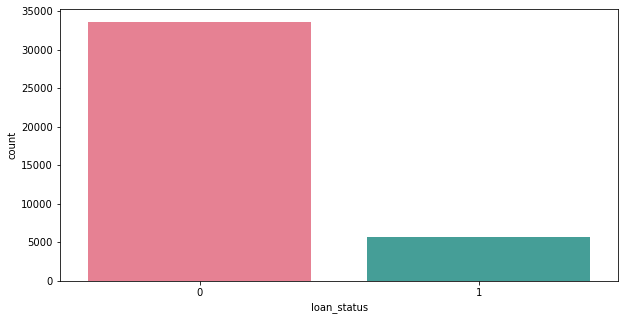

In [54]:
fig = plt.subplots(figsize=(10,5))
sns.countplot(x=loans['loan_status'], data=loans, palette='husl')

My data is largely imbalanced, the ratio is 86% for fully paid loans & only 14% for charged off loans. I will need to deal with it later.

### looking at FICO score columns

*FICO credit scores are a method of quantifying and evaluating an individual’s creditworthiness. Scores range from 300 to 850, with scores in the 670 to 739 range considered to be “good” credit history. FICO scores take into account data in five areas to determine creditworthiness: payment history, current level of indebtedness, types of credit used, length of credit history, and new credit accounts. Lenders use borrowers’ FICO scores along with other details on borrowers’ credit reports to assess credit risk and determine whether to extend credit.* (https://www.listendata.com/2019/08/datasets-for-credit-risk-modeling.html)

In [59]:
print(loans['fico_range_low'].unique())
print()
print(loans['fico_range_high'].unique())

[735. 740. 690. 730. 660. 675. 725. 695. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.]

[739. 744. 694. 734. 664. 679. 729. 699. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.]


In [60]:
print(loans['fico_range_low'].describe())
print()
print(loans['fico_range_high'].describe())

count    39239.000000
mean       715.000765
std         35.868102
min        625.000000
25%        685.000000
50%        710.000000
75%        740.000000
max        825.000000
Name: fico_range_low, dtype: float64

count    39239.000000
mean       719.000765
std         35.868102
min        629.000000
25%        689.000000
50%        714.000000
75%        744.000000
max        829.000000
Name: fico_range_high, dtype: float64


The Lending club data does not contain the exact value of the FICO score. It contains a FICO score over four points with lower and upper boundaries, also both fico_range_high and fico_range_low have similar mean and standard deviation. I took the mean of these two variables and created a new variabe 'fico_range_avg'.

In [61]:
loans['fico_range_avg'] = (loans['fico_range_high'] + loans['fico_range_low']) / 2


In [62]:
loans['fico_range_avg'].isnull().sum()

0

In [63]:
loans['fico_range_avg'].describe()

count    39239.000000
mean       717.000765
std         35.868102
min        627.000000
25%        687.000000
50%        712.000000
75%        742.000000
max        827.000000
Name: fico_range_avg, dtype: float64

In [64]:
#now I can drop 'fico_range_high' & 'fico_range_low'
loans = loans.drop(['fico_range_high', 'fico_range_low'], axis=1)

<Figure size 4200x2100 with 0 Axes>

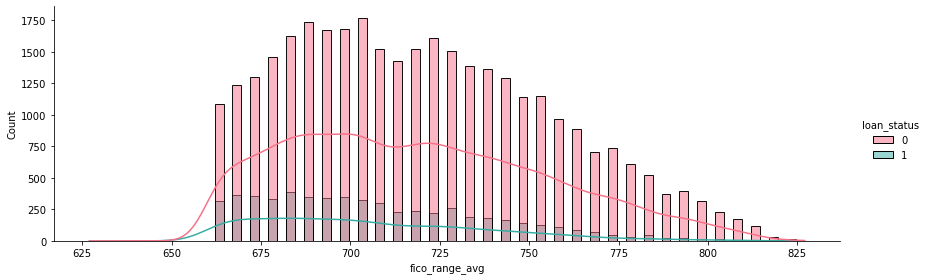

In [65]:
# lets see what is the distribution of cust who paid the loan & cust who didn't
plt.figure(figsize=(14,7), dpi=300)
sns.displot(data=loans, x='fico_range_avg', hue='loan_status', bins=80, height=4,
            aspect=3, kde=True, palette='husl')

<AxesSubplot:xlabel='loan_status', ylabel='fico_range_avg'>

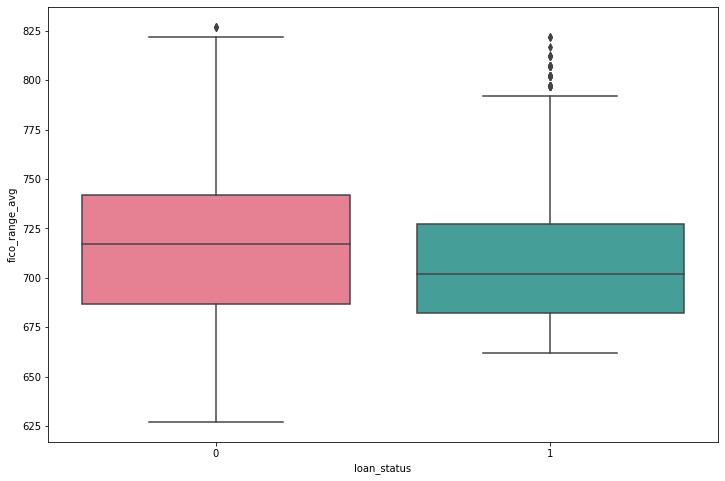

In [66]:
# plt.figure(figsize=(20,10), dpi=70)
sns.boxplot(data=loans, x = 'loan_status', y ='fico_range_avg', palette='husl')

*We can see a vsible difference between customers who fully paid off and who did not*

In [67]:
# I can also remove last_fico_range_low', 'last_fico_range_high'
loans = loans.drop(['last_fico_range_low', 'last_fico_range_high'], axis=1)

*From the plot w ecan see that the highest group of customers to apply for a loan is the one with employment length 10+*

In [68]:
loans.shape

(39239, 22)

Grouping columns by object and number

In [69]:
object_columns = loans.select_dtypes(include=['object'])
number_columns = loans.select_dtypes(include=['number'])
print(object_columns.iloc[0])
print()
print(number_columns.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
application_type        INDIVIDUAL
Name: 0, dtype: object

loan_amnt                5000.00
funded_amnt              5000.00
funded_amnt_inv          4975.00
annual_inc              24000.00
loan_status                 0.00
dti                        27.65
inq_last_6mths              1.00
open_acc                    3.00
pub_rec                     0.00
total_acc                   9.00
pub_rec_bankruptcies        0.00
fico_range_avg            737.00
Name: 0, dtype: float64


### 'term' 
The number of payments on the loan. Values are in months and can be either 36 or 60.

In [70]:
print(loans['term'].unique())
print(loans['term'].isnull().sum())

[' 36 months' ' 60 months']
0


In [71]:
#I'm replacing months with an epty string & converting str to numerics 
loans['term'] = pd.to_numeric(loans['term'].str.replace('months', ''))

In [72]:
type(loans['term'][0])

numpy.int64

In [73]:
#computing a frequency table of 'term' & 'loan_status'
pd.crosstab(loans['term'], loans['loan_status'])

loan_status,0,1
term,,
36,25869,3227
60,7717,2426


In [74]:
#I want to see what is the ratio of charged off loans regarding the term:

term36 = loans['loan_status'][loans['term'] == 36].value_counts()
term36_default = round(term36[1] / (term36[0]+term36[1]), 2)
term36_default

0.11

In [75]:
term60 = loans['loan_status'][loans['term'] == 60].value_counts()
term60_default = round(term60[1] / (term60[0]+term60[1]), 2)
term60_default

0.24

<AxesSubplot:xlabel='term'>

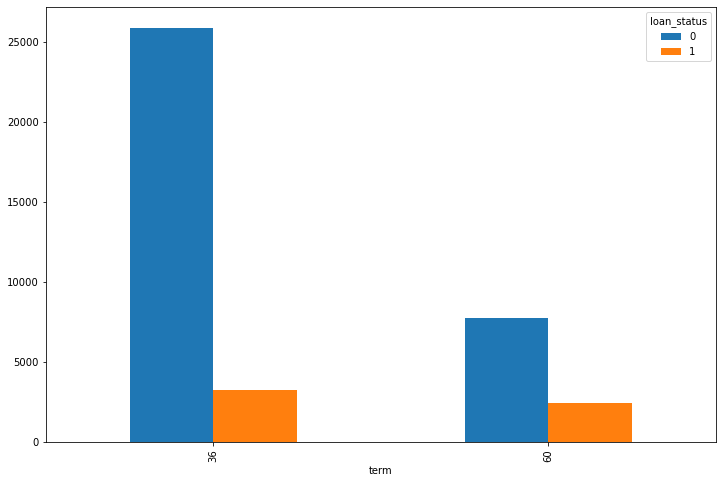

In [76]:
pd.crosstab(loans["term"], loans["loan_status"]).plot(kind="bar")

* clients with a longer term loan, default on loans more often than those with a shorter term *

### 'emp_length'
describes how long borrower has been employed befor the applyng for a lona. It's a categorical variable. Im going to make this this variable continues going from 0 to 10.

In [77]:
print(loans['emp_length'].unique())
print(loans['emp_length'].isnull().sum())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]
1057


In [78]:
loans['emp_length'].value_counts()


10+ years    8717
< 1 year     4556
2 years      4349
3 years      4054
4 years      3394
5 years      3250
1 year       3214
6 years      2202
7 years      1742
8 years      1459
9 years      1245
Name: emp_length, dtype: int64

In [79]:
#I'm creating a dictionary to replace string caraters and leaving only integers
sorted_empLength = {'emp_length':{'10+ years': 10,
                             '9 years': 9,
                             '8 years': 8,
                             '7 years': 7,
                             '6 years': 6,
                             '5 years': 5,
                             '4 years': 4,
                             '3 years': 3,
                             '2 years': 2,
                             '1 year': 1,
                              '< 1 year': 0}}
loans = loans.replace(sorted_empLength)

In [80]:
#I have over a thousand missing values, I'm checking what is the proportion of miss val
loans['loan_status'][loans['emp_length'].isnull()].value_counts()

0    827
1    230
Name: loan_status, dtype: int64

In [81]:
#calculating mean of 'emp_length'
loans['emp_length'].mean()

4.959221622754177

In [82]:
#I'm going to replacing nan values with a mean of 'emp_length' ~ 5 years
loans['emp_length'] = loans['emp_length'].fillna(5)

In [83]:
type(loans['emp_length'][0])

numpy.float64

In [84]:
print(loans['emp_length'].head(5))
print(loans['emp_length'].isnull().sum())

0    10.0
1     0.0
2    10.0
3    10.0
5     3.0
Name: emp_length, dtype: float64
0


In [280]:
loans['emp_length'].value_counts()

10.0    8034
0.0     4367
2.0     4135
5.0     4111
3.0     3885
4.0     3238
1.0     3072
6.0     2104
7.0     1656
8.0     1366
9.0     1172
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length'>

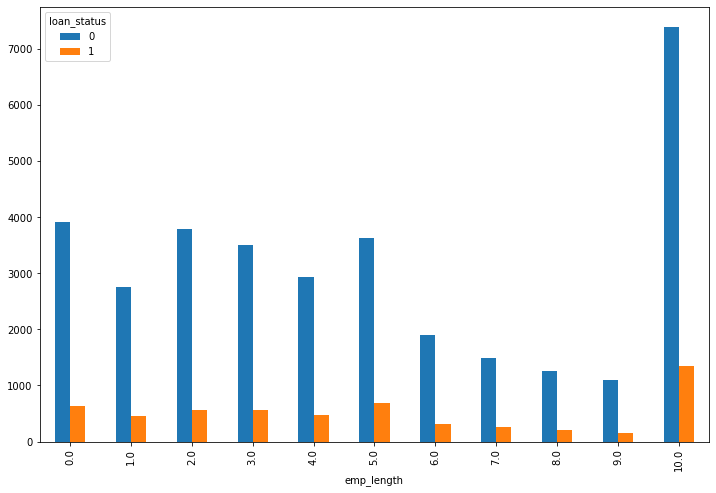

In [85]:
pd.crosstab(loans['emp_length'], loans['loan_status']).plot(kind='bar')

Highest group of people who are applying for a loan 

### 'revol_util'
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [86]:
print(loans['revol_util'].unique())
print(loans['revol_util'].isnull().sum())
print(type(loans['revol_util'][0]))

['83.7%' '9.4%' '98.5%' ... '49.63%' '0.04%' '7.28%']
50
<class 'str'>


In [87]:
#I'm replacing % with an epty string & converting str to numerics 
loans['revol_util'] = pd.to_numeric(loans['revol_util'].str.replace('%', ''))

In [91]:
#replacing nan values with mean of non mising values
loans['revol_util'] = loans['revol_util'].fillna(loans['revol_util'].mean())

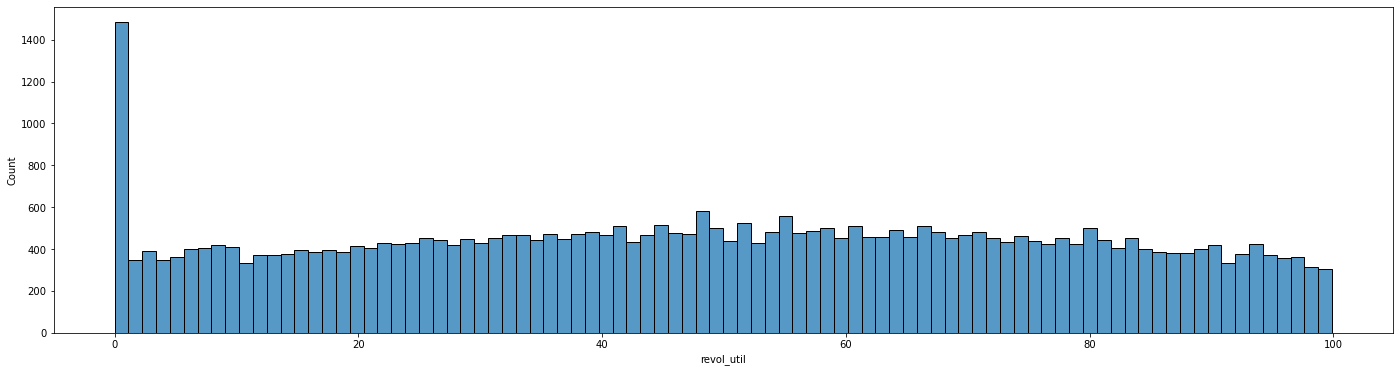

In [92]:
plt.figure(figsize=(24,6))
sns.histplot(data=loans, x='revol_util', bins=88, palette='husl');

In [93]:
loans['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [94]:
loans['revol_util'].describe()

count    39239.000000
mean        48.737661
std         28.332853
min          0.000000
25%         25.300000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [95]:
pd.crosstab(loans['revol_util'], loans['loan_status'])

loan_status,0,1
revol_util,,
0.00,827,145
0.01,1,0
0.03,1,0
0.04,1,0
0.05,1,0
...,...,...
99.50,18,6
99.60,18,4
99.70,29,1


<AxesSubplot:xlabel='revol_util', ylabel='Count'>

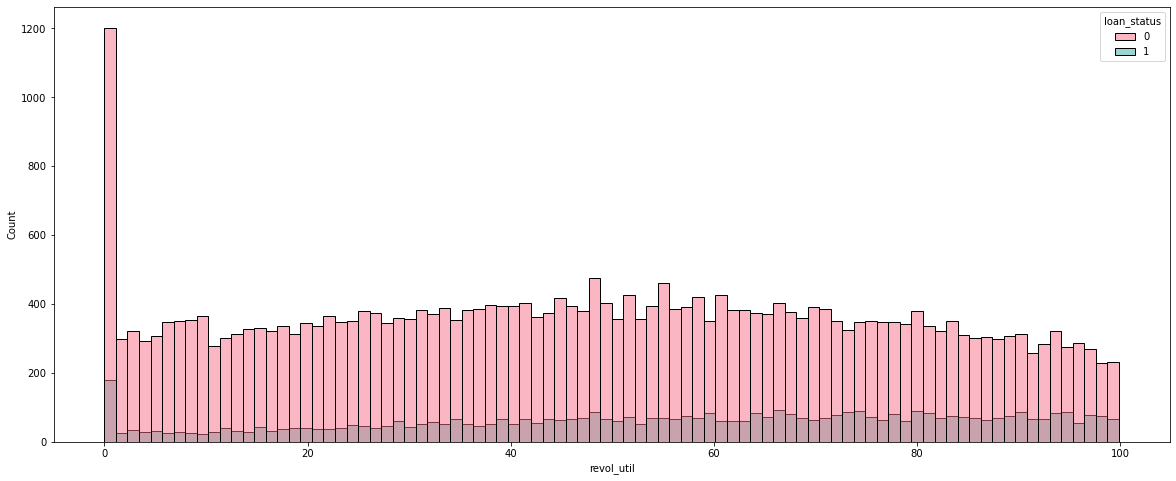

In [201]:
plt.figure(figsize=(20,8))
sns.histplot(data=loans, x='revol_util', hue='loan_status', bins=88, palette='husl')

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

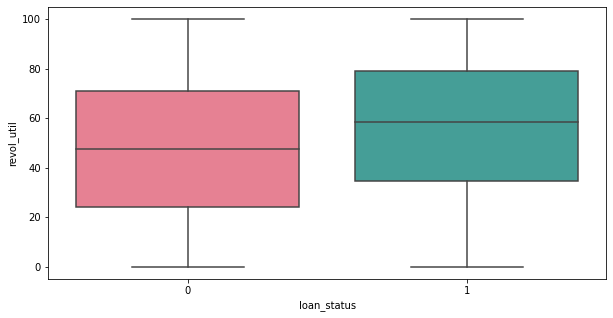

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loans, x='loan_status', y='revol_util', palette='husl')

I can see that charged off customers have higher utilization rate than the other group.

### 'earliest_cr_line' 
The month the borrower's earliest reported credit line was opened

In [98]:
#checking for misssing values & what datatype it is
print(loans['earliest_cr_line'].isnull().sum())
print(loans['earliest_cr_line'].dtypes)

0
object


In [99]:
loans['earliest_cr_line']

0        Jan-1985
1        Apr-1999
2        Nov-2001
3        Feb-1996
5        Nov-2004
           ...   
39781    Nov-1990
39782    Dec-1986
39783    Oct-1998
39784    Nov-1988
39785    Oct-2003
Name: earliest_cr_line, Length: 39239, dtype: object

In [101]:
#converting strings into timeframes & saving it to new var 'date_earliest_cr_line'
loans['date_earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'], format='%b-%Y')

In [102]:
# I'm calculating the difference between two dates and times.
pd.to_datetime('2017-12-01') - loans['date_earliest_cr_line']

0       12022 days
1        6819 days
2        5874 days
3        7974 days
5        4778 days
           ...    
39781    9892 days
39782   11323 days
39783    7001 days
39784   10622 days
39785    5175 days
Name: date_earliest_cr_line, Length: 39239, dtype: timedelta64[ns]

In [103]:
# I want to get the diff in months(easier for calculation), then turn it to numerics &round it, 
#also creating new var 'inMonths_earliest_cr_line'
loans['inMonths_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-loans['date_earliest_cr_line'])/np.timedelta64(1,'M')))

In [104]:
#checking some descriptive stat
loans['inMonths_earliest_cr_line'].describe()

count    39239.000000
mean       250.209511
std         81.999418
min        109.000000
25%        195.000000
50%        235.000000
75%        288.000000
max        863.000000
Name: inMonths_earliest_cr_line, dtype: float64

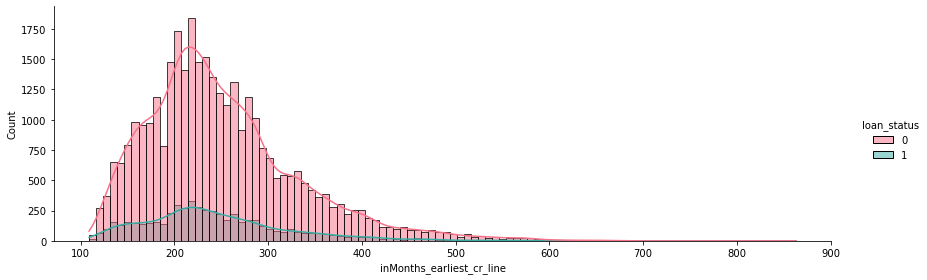

In [105]:
#checking the distribution
sns.displot(data=loans, x='inMonths_earliest_cr_line', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='husl');

<AxesSubplot:xlabel='loan_status', ylabel='inMonths_earliest_cr_line'>

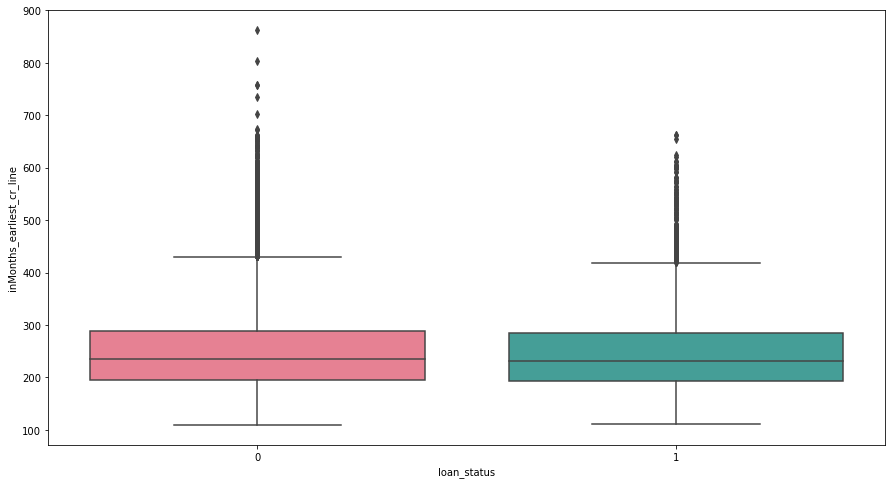

In [106]:
plt.figure(figsize=(15,8))
sns.boxplot(data=loans, y='inMonths_earliest_cr_line', x='loan_status', palette='husl')

From the above plots I can see that there is not much difference between customers who paid the loans and the once that where charged off. Also boxplot shows that there is a loarge amount of outlires, I've decided to drop the columns.

In [107]:
to_drop = ['earliest_cr_line', 'date_earliest_cr_line', 'inMonths_earliest_cr_line']
loans = loans.drop(to_drop, axis=1)

In [108]:
loans.shape

(39239, 21)

### 'grade'
LC assigned loan grade.
The loan grade is the result of a formula that takes into account not only credit score, but also a combination of several indicators of credit risk from the credit report and loan application. The grade indicates what % will be applied to the loan. Where A is the lowest % and G the highest.

In [109]:
print(loans['grade'].unique())
print(loans['grade'].isnull().sum())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
0


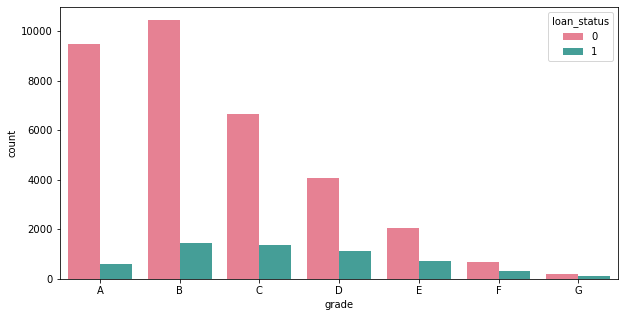

In [110]:
# plotting cutomers number separated by grade and based on their loan_status
plt.figure(figsize=(10,5))
sns.countplot(x='grade',data=loans,hue='loan_status', order=sorted(loans['grade'].unique()), palette='husl');

In [111]:
#creating a new dummy variable &making more descreptive by adding grade in front of the letter
dummy_grade = pd.get_dummies(loans['grade'], prefix='grade', prefix_sep=':')
dummy_grade.head(2)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0


In [275]:
#dropping column 'grade' & concating the 'dummy_grade'
loans = pd.concat([loans.drop('grade', axis=1), dummy_grade], axis=1)

KeyError: "['grade'] not found in axis"

charged off loans have higher grade

### 'home_ownership'
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [113]:
print(loans['home_ownership'].isnull().sum())

0


In [114]:
pd.crosstab(loans['home_ownership'], loans['loan_status'])

loan_status,0,1
home_ownership,,
MORTGAGE,15052,2344
NONE,3,0
OTHER,80,18
OWN,2583,445
RENT,15868,2846


In [115]:
#I'm going to merge other & none categories with rent 
loans['home_ownership'] = loans['home_ownership'].replace(['NONE', 'OTHER'], 'RENT')

In [116]:
loans['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

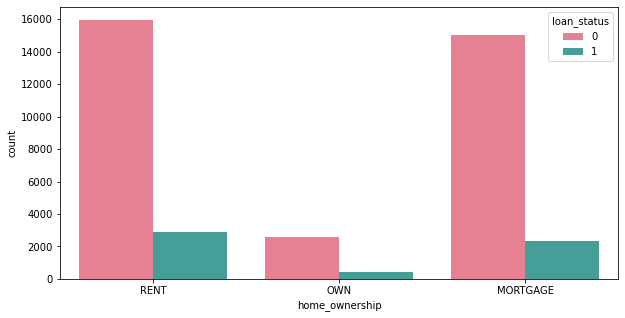

In [117]:
plt.figure(figsize=(10,5))
sns.countplot(x='home_ownership',data=loans,hue='loan_status', palette='husl')

In [118]:
#creating a new dummy variable &making it more descreptive by adding home_ownership in front of the letter
dummy_home_ownership = pd.get_dummies(loans['home_ownership'], prefix='home_ownership', prefix_sep=':')
dummy_home_ownership.head(2)

,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT
0,0,0,1
1,0,0,1


In [119]:
#dropping column 'home_ownership' & concating the 'dummy_home_ownership'
loans = pd.concat([loans.drop('home_ownership', axis=1), dummy_home_ownership], axis=1)

### 'verification_status'
Indicates if income was verified by LC, not verified, or if the income source was verified

In [120]:
print(loans['verification_status'].unique())
print(loans['verification_status'].isnull().sum())

['Verified' 'Source Verified' 'Not Verified']
0


In [121]:
pd.crosstab(loans['verification_status'], loans['loan_status'])

loan_status,0,1
verification_status,,
Not Verified,14701,2144
Source Verified,8424,1444
Verified,10461,2065


<AxesSubplot:xlabel='verification_status', ylabel='count'>

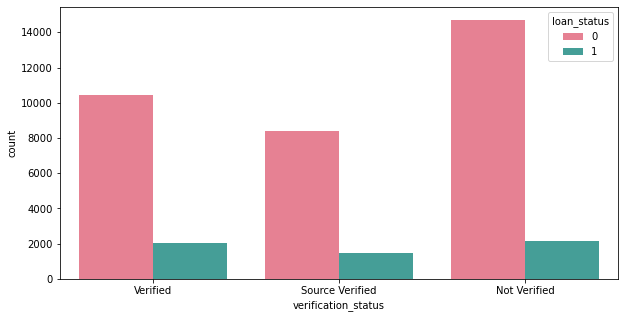

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(data=loans, x='verification_status', hue='loan_status', palette='husl')

In [123]:
#creating a new dummy variable & making it more descreptive by adding home_ownership in front of the different source statuses
dummy_verification_status = pd.get_dummies(loans['verification_status'], prefix='verification_status', prefix_sep=':')
dummy_verification_status.head(2)

,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified
0,0,0,1
1,0,1,0


In [124]:
#dropping column 'verification_status' & concating the 'dummy_verification_status'
loans = pd.concat([loans.drop('verification_status', axis=1), dummy_verification_status], axis=1)

### 'purpose'
A category provided by the borrower for the loan request.

In [125]:
print(loans['purpose'].unique())
print(loans['purpose'].isnull().sum())

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
0


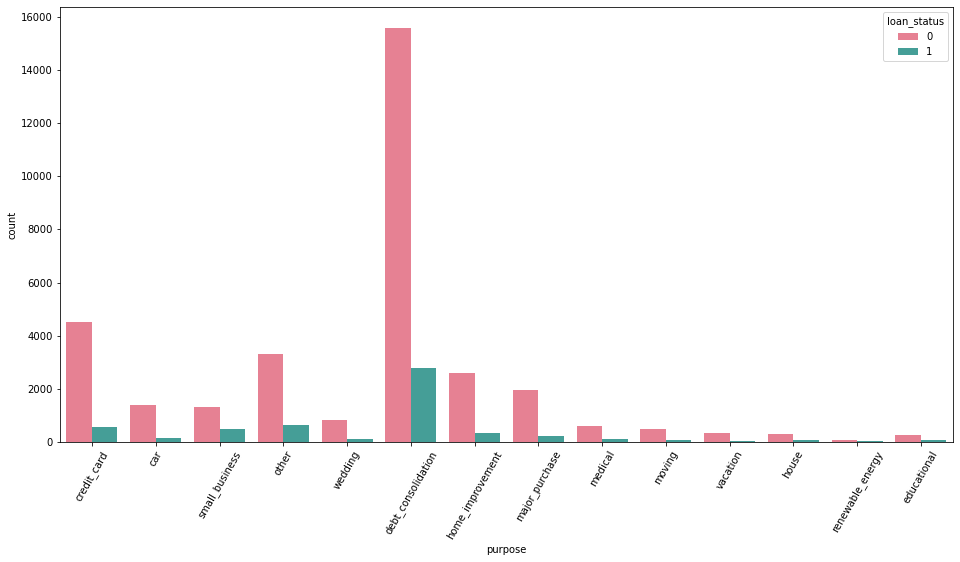

In [126]:
plt.figure(figsize=(16,8))
sns.countplot(data=loans, x='purpose', hue='loan_status', palette='husl')
plt.xticks(rotation=60);

In [127]:
pd.crosstab(loans['purpose'], loans['loan_status'])

loan_status,0,1
purpose,,
car,1376,160
credit_card,4531,545
debt_consolidation,15585,2785
educational,269,56
home_improvement,2600,349
house,313,59
major_purchase,1962,222
medical,584,106
moving,490,92


In [128]:
loans['purpose'].value_counts() / loans['purpose'].count()

debt_consolidation    0.468157
credit_card           0.129361
other                 0.100334
home_improvement      0.075155
major_purchase        0.055659
small_business        0.045771
car                   0.039145
wedding               0.023981
medical               0.017585
moving                0.014832
vacation              0.009633
house                 0.009480
educational           0.008283
renewable_energy      0.002625
Name: purpose, dtype: float64

In [129]:
#creating a new dummy variable & making it more descreptive by adding purpose in front of the categories
dummy_purpose = pd.get_dummies(loans['purpose'], prefix='purpose', prefix_sep=':')

In [130]:
#dropping column 'purpose' & concating the 'dummy_purpose'
loans = pd.concat([loans.drop('purpose', axis=1), dummy_purpose], axis=1)

### addr_state
The state provided by the borrower in the loan application.

In [131]:
print(loans['addr_state'].unique())
print(loans['addr_state'].isnull().sum())
print(len(loans['addr_state'].unique()))

['AZ' 'GA' 'IL' 'CA' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN'
 'NJ' 'OR' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'KS' 'NV' 'AK'
 'CO' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
0
50


In [132]:
loans['addr_state'].value_counts()

CA    7029
NY    3759
FL    2834
TX    2698
NJ    1830
IL    1514
PA    1497
VA    1389
GA    1381
MA    1323
OH    1202
MD    1041
AZ     867
WA     831
CO     778
NC     773
CT     738
MI     718
MO     678
MN     611
NV     489
SC     469
WI     448
OR     442
AL     442
LA     432
KY     319
OK     295
KS     265
UT     255
AR     242
DC     213
RI     197
NM     187
WV     174
HI     171
NH     169
DE     114
MT      84
WY      83
AK      79
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

I was thinking of dummifying 'addr_state column' column, as which contains categorical values but it has too many unique val so I've decided to drop it.

In [133]:
loans = loans.drop(['addr_state'], axis=1)

### 'application_type' 
Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [134]:
print(loans['application_type'].unique())
print(loans['application_type'].isnull().sum())
print(loans['application_type'].value_counts())

['INDIVIDUAL']
0
INDIVIDUAL    39239
Name: application_type, dtype: int64


In [135]:
#I'm dropping this column as there is only 1 unique value, all loans are for individuals
loans = loans.drop(['application_type'], axis=1)

### 'loan_amnt'
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [276]:
print(loans['loan_amnt'].isnull().sum())

0


In [137]:
loans['loan_amnt'].describe()

count    39239.000000
mean     11134.730115
std       7398.238030
min        500.000000
25%       5400.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [202]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,31775.0,10717.287175,7055.624838,500.0,5000.0,9325.0,15000.0,35000.0
1,5365.0,11884.231128,7963.521722,900.0,5500.0,10000.0,16000.0,35000.0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

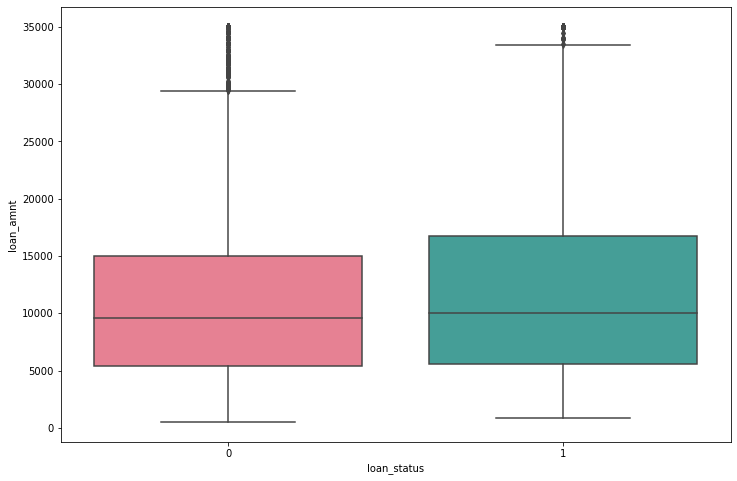

In [139]:
sns.boxplot(data=loans, y='loan_amnt', x='loan_status', palette='husl')

From loan amount mean, it can be seen that the group of customers with charged off status took larger loans, that the other group.

### 'annual_inc'
The self-reported annual income provided by the borrower during registration

In [140]:
loans['annual_inc'].isnull().sum()

0

In [141]:
loans['annual_inc'].describe()

count    3.923900e+04
mean     6.888432e+04
std      6.400031e+04
min      4.000000e+03
25%      4.001400e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

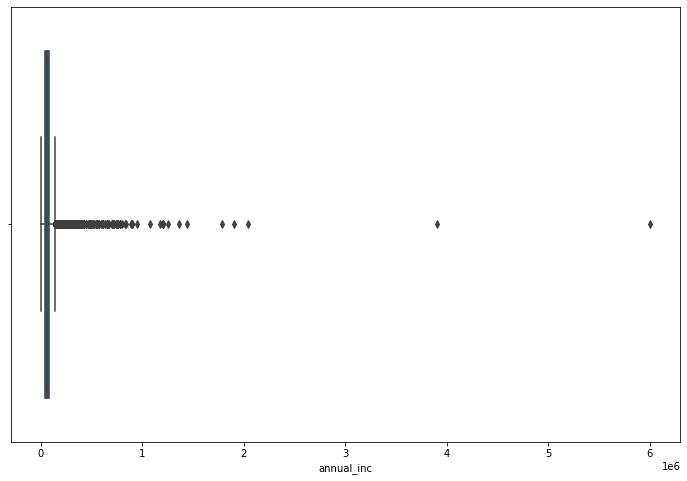

In [142]:
sns.boxplot(loans['annual_inc'])

In [143]:
#boxpolt shows that there is a good few outliers, lets detect them
Q1 = np.quantile(loans["annual_inc"],0.25)
Q3 = np.quantile(loans["annual_inc"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 40014.0
Q3 : 82000.0
IQR : 41986.0
Low_outliers : -22965.0
High_outliers : 144979.0


In [144]:
#checking how customers have income of 140k or higer
len(loans[loans['annual_inc']>140000])

1986

In [145]:
#checking the % of rows with annual income of 140k
income140 = 1986*100/len(loans)
income140

5.061291062463366

In [146]:
#checking how customers have income of 200k or higer
len(loans[loans['annual_inc']>175000])

970

In [147]:
income175 = 970*100/len(loans)
income175

2.4720303779403143

In [148]:
# 5.06% of my data is quite a lot, I will remove only annual income above 175k 
loans = loans[loans['annual_inc']<=175000]

In [149]:
len(loans)

38269

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

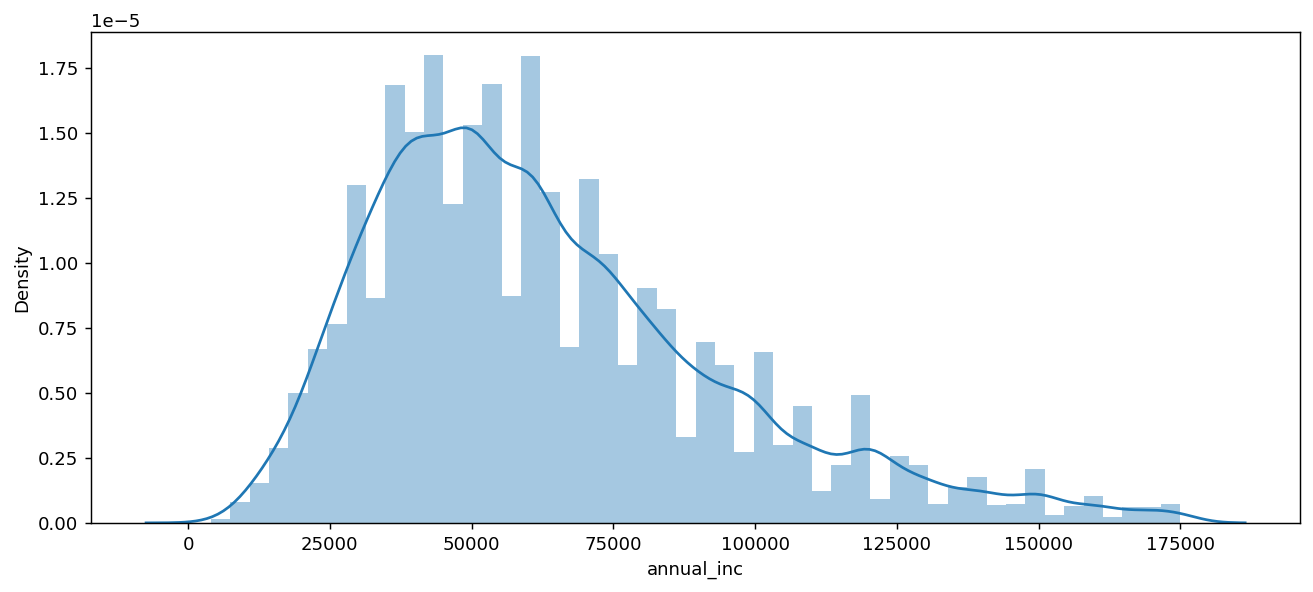

In [150]:
#checking the distribution after removing some of the outlires
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(loans['annual_inc'])

The distribution is not perfect but definitely much better than before.

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

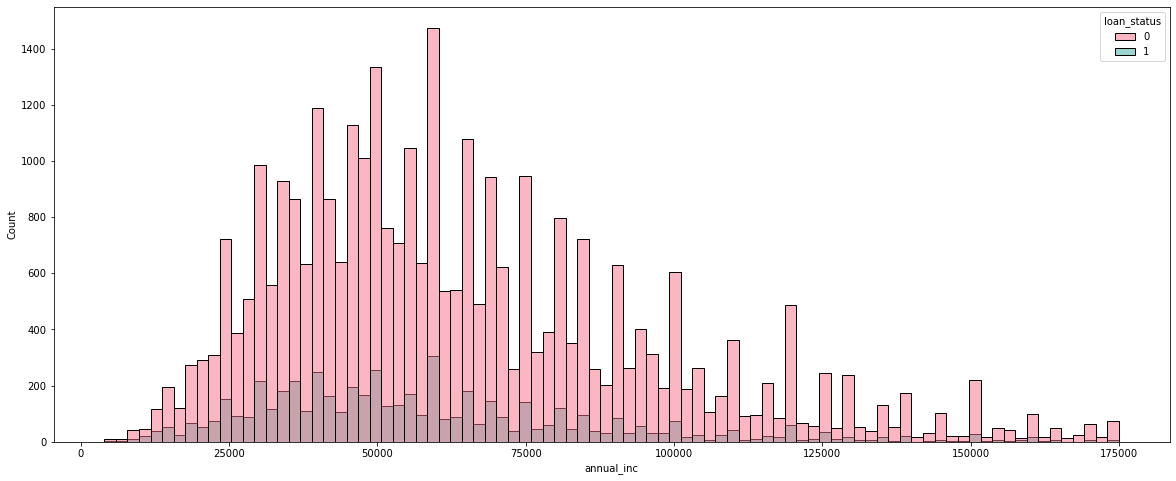

In [151]:
plt.figure(figsize=(20,8))
sns.histplot(data=loans, x='annual_inc', hue='loan_status', bins=88, palette='husl')

In [152]:
loans.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32721.0,64279.200976,31574.866044,4000.0,40800.0,58800.0,80004.0,175000.0
1,5548.0,58388.939652,29661.365486,4080.0,36999.0,52000.0,73000.0,175000.0


The avarage income of cusomers who paid their loan and the once who did not differ by more than 6k, meaning that people who defaulted on a loan earn less by around 6k. 

### dti 
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [153]:
print(loans['dti'].unique())
print(loans['dti'].isnull().sum())

[27.65  1.    8.72 ...  0.09  0.12 25.43]
0


In [154]:
loans['dti'].describe()

count    38269.000000
mean        13.403896
std          6.662980
min          0.000000
25%          8.290000
50%         13.510000
75%         18.670000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

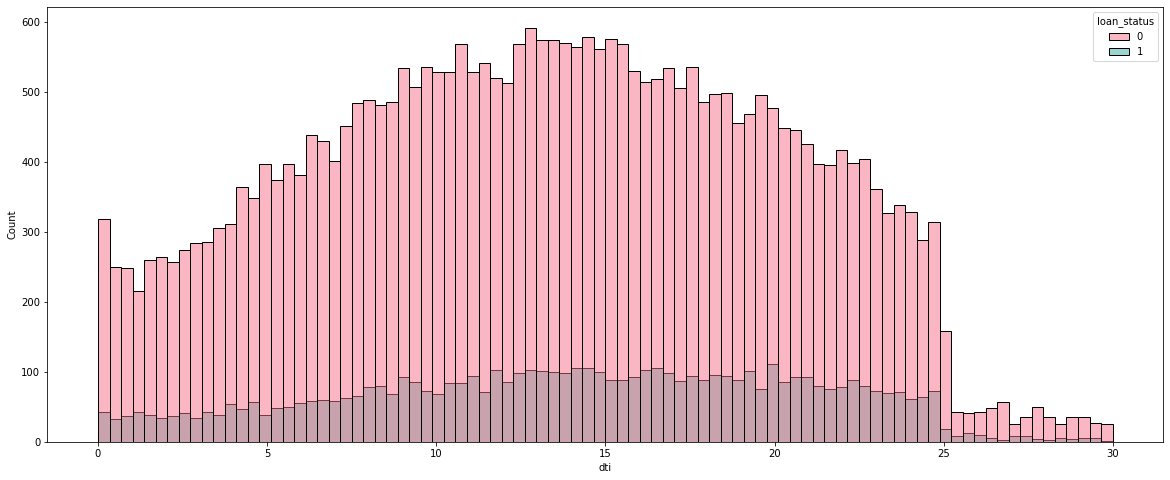

In [158]:
plt.figure(figsize=(20,8))
sns.histplot(data=loans, x='dti', hue='loan_status', bins=88, palette='husl')

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

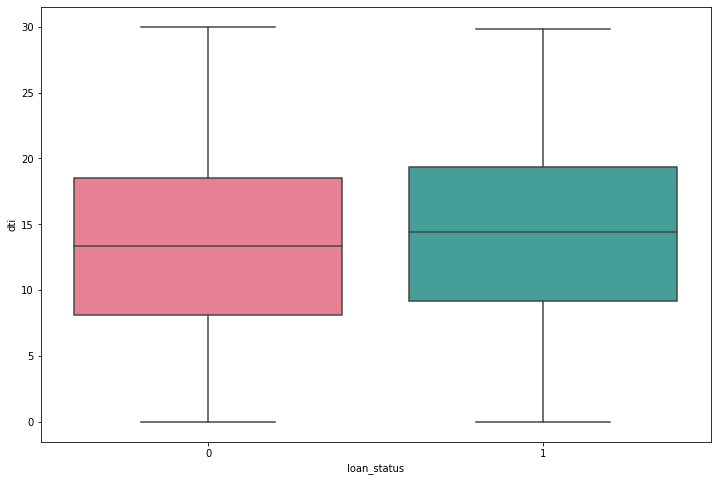

In [159]:
sns.boxplot(data = loans, x ='loan_status', y='dti', palette='husl')

In [160]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32721.0,13.287914,6.671524,0.0,8.14,13.37,18.54,29.99
1,5548.0,14.087933,6.571447,0.0,9.17,14.40,19.36,29.85


We can see that 'dti' ratio of customers who fully paid is lower than the other group by over 1%.

### 'inq_last_6mths'
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [161]:
print(loans['inq_last_6mths'].unique())
print(loans['inq_last_6mths'].isnull().sum())

[1. 5. 2. 3. 0. 4. 6. 7. 8.]
0


<AxesSubplot:xlabel='inq_last_6mths'>

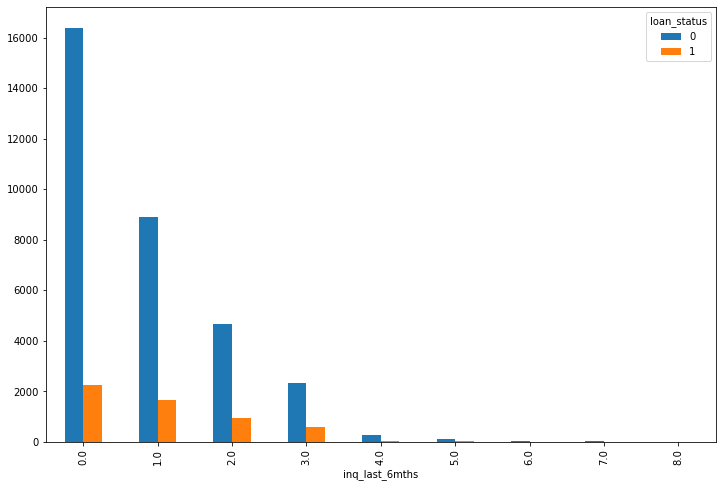

In [162]:
pd.crosstab(loans['inq_last_6mths'], loans['loan_status']).plot(kind='bar')

<AxesSubplot:xlabel='inq_last_6mths'>

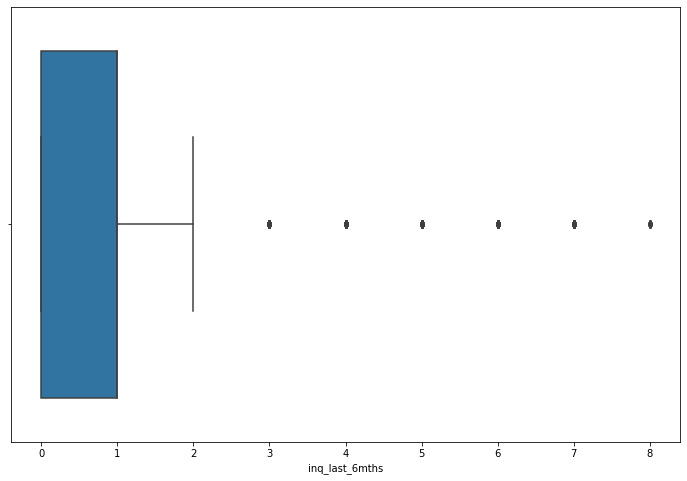

In [163]:
sns.boxplot(loans['inq_last_6mths'])

In [164]:
#boxpolt shows that there is a good few outliers, lets detect them
Q1 = np.quantile(loans['inq_last_6mths'],0.25)
Q3 = np.quantile(loans['inq_last_6mths'],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 0.0
Q3 : 1.0
IQR : 1.0
Low_outliers : -1.5
High_outliers : 2.5


In [165]:

len(loans[loans['inq_last_6mths']>3])

551

In [166]:
#Im removing rows with inq greater than 3
loans = loans[loans['inq_last_6mths']<=4]

In [167]:
loans.shape

(38028, 42)

<AxesSubplot:xlabel='inq_last_6mths'>

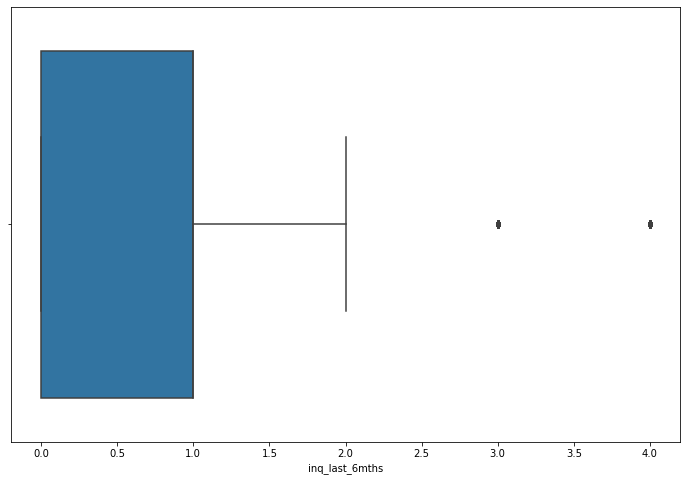

In [168]:
sns.boxplot(loans['inq_last_6mths'])

In [169]:
loans.groupby('loan_status')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32534.0,0.805649,0.982779,0.0,0.0,0.0,1.0,4.0
1,5494.0,1.006189,1.050499,0.0,0.0,1.0,2.0,4.0


People who defaulted on loans inquired about credit more often than the other group

### 'open_acc'
The number of open credit lines in the borrower's credit file.

In [170]:
print(loans['open_acc'].unique())
print(loans['open_acc'].isnull().sum())

[ 3.  2. 10.  9.  7.  4. 11. 14. 12. 20.  8.  6. 15. 17.  5. 13. 16. 30.
 21. 18. 19. 27. 23. 34. 25. 22. 24. 26. 32. 28. 29. 33. 31. 39. 36. 38.
 35. 44. 41. 42.]
0


<AxesSubplot:xlabel='open_acc'>

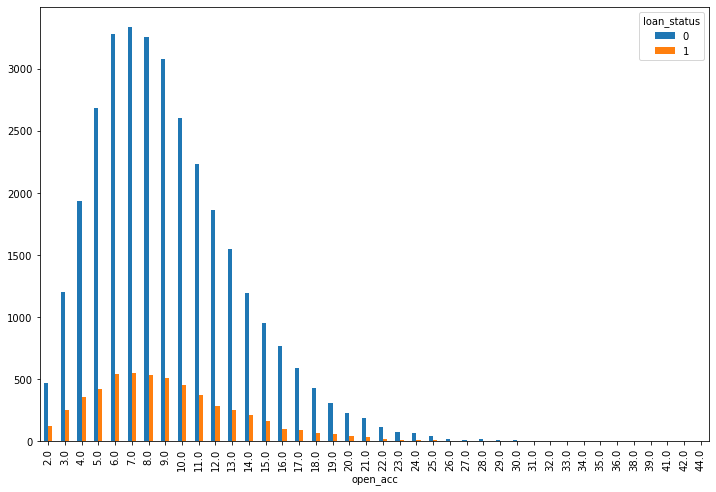

In [171]:
#checking the distribution
pd.crosstab(loans['open_acc'], loans['loan_status']).plot(kind='bar')

<AxesSubplot:xlabel='open_acc'>

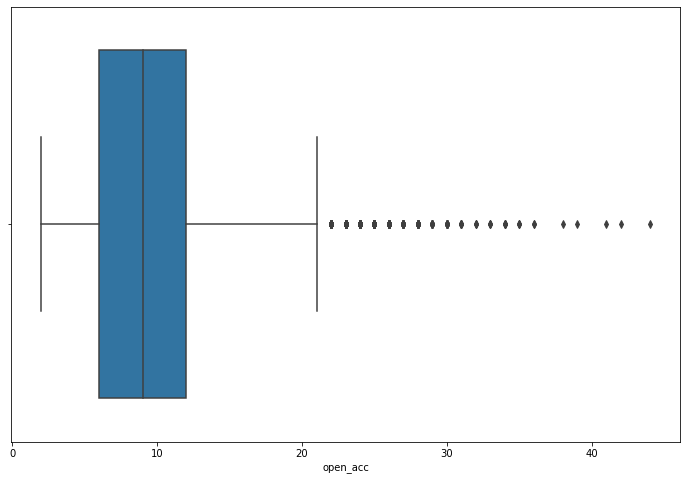

In [172]:
sns.boxplot(loans['open_acc'])

In [173]:
#boxpolt shows that there is a good few outliers, lets detect them
Q1 = np.quantile(loans['open_acc'],0.25)
Q3 = np.quantile(loans['open_acc'],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 6.0
Q3 : 12.0
IQR : 6.0
Low_outliers : -3.0
High_outliers : 21.0


In [174]:
len(loans[loans['open_acc']>21])

471

In [175]:
#removing rows with 21 or more acc opened
loans = loans[loans['open_acc']<=21]

<AxesSubplot:xlabel='open_acc'>

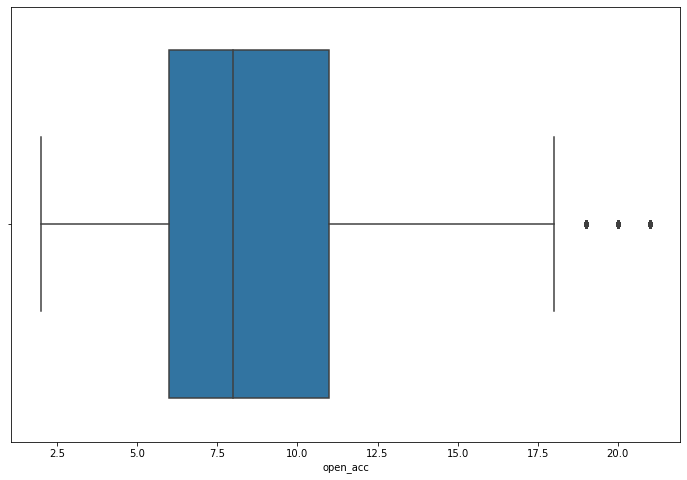

In [176]:
sns.boxplot(loans['open_acc'])

In [177]:
loans.groupby('loan_status')['open_acc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32138.0,9.052212,4.010598,2.0,6.0,8.0,12.0,21.0
1,5419.0,8.909946,4.080766,2.0,6.0,8.0,11.0,21.0


There is no much difference between two groups in relation to open credit lines. But decided to keep it.

### 'pub_rec'
Number of derogatory public records.

In [178]:
print(loans['pub_rec'].unique())
print(loans['pub_rec'].isnull().sum())

[0. 1. 2. 3. 4.]
0


In [179]:
loans['pub_rec'].describe()

count    37557.000000
mean         0.056394
std          0.239630
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

<AxesSubplot:xlabel='pub_rec'>

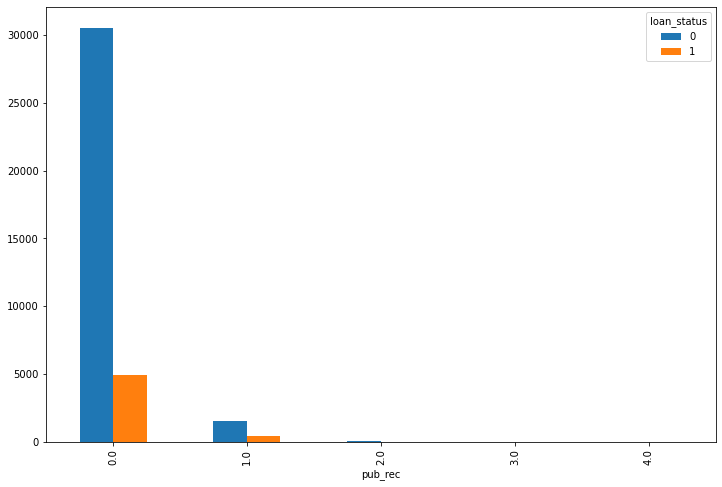

In [180]:
pd.crosstab(loans['pub_rec'], loans['loan_status']).plot(kind='bar')

<AxesSubplot:xlabel='pub_rec'>

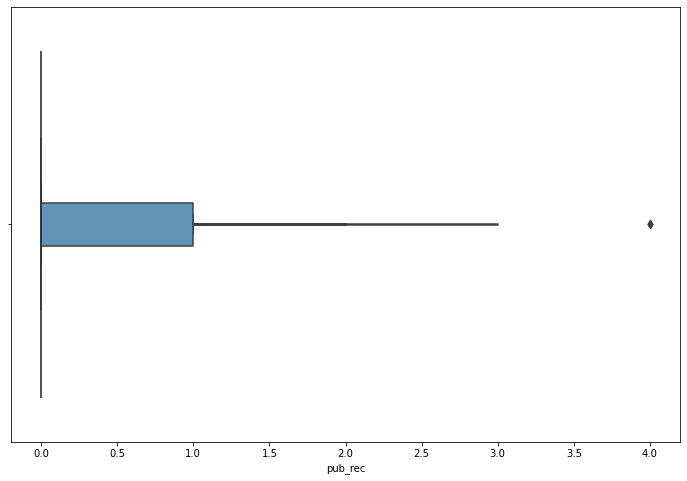

In [181]:
sns.boxenplot(loans['pub_rec'])

In [182]:
# I'm going to drop ouliers,all rows where customers have 'pub_rec' greater than 2
# but first I'm going to check how many customer has 'pub_rec' greater than 2

len(loans[loans['pub_rec']>2])


9

In [183]:
loans = loans[loans['pub_rec'] < 3]

In [184]:
loans.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32129.0,0.050484,0.224004,0.0,0.0,0.0,0.0,2.0
1,5419.0,0.086178,0.287154,0.0,0.0,0.0,0.0,2.0


The mean of 'pub_rec' is greater for customers with category 0 

### 'total_acc'
The total number of credit lines currently in the borrower's credit file.

In [185]:
print(loans['total_acc'].unique())
print(loans['total_acc'].isnull().sum())

[ 9. 10. 37. 12. 11.  4. 13.  3. 23. 34. 29. 28. 42. 14. 22. 38. 21. 17.
  7. 31. 44. 26. 16.  6. 18. 27. 25. 40. 35. 24.  8. 20. 15. 19. 36. 51.
 32. 30. 33. 46.  5. 61. 50. 41. 62. 43. 47. 53. 56. 45. 60. 55. 39. 54.
 57. 49. 48. 52. 59. 63. 58. 87. 64. 67. 66. 79. 90. 69. 73. 70. 68.  2.]
0


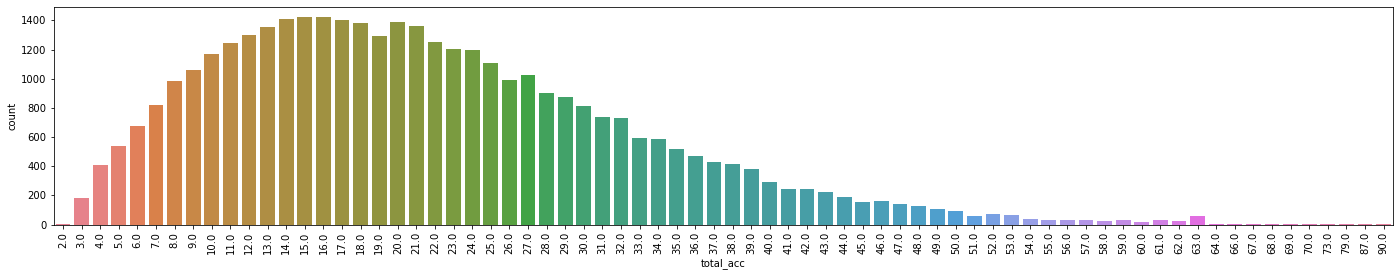

In [186]:
#checking the distribution of cust.

plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=loans, x='total_acc', palette='husl');


<AxesSubplot:xlabel='total_acc'>

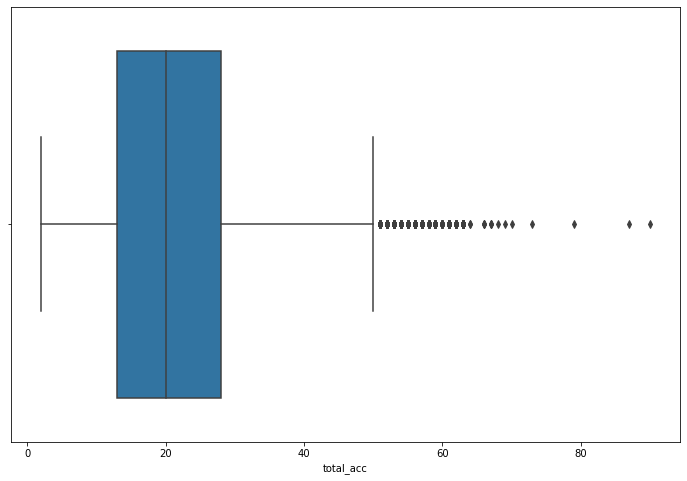

In [187]:
sns.boxplot(loans['total_acc'])

In [188]:
#boxpolt shows that there is a good few outliers, lets detect them
Q1 = np.quantile(loans['total_acc'],0.25)
Q3 = np.quantile(loans['total_acc'],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print('Q1 :',Q1)
print('Q3 :', Q3)
print('IQR :', IQR)
print('Low_outliers :', round(Low_outliers,4))
print('High_outliers :', round(High_outliers,4))

Q1 : 13.0
Q3 : 28.0
IQR : 15.0
Low_outliers : -9.5
High_outliers : 50.5


In [189]:
# I have checked 
#but thats going to be a big chunk of my data, I will remove rows with anything >51
len(loans[loans['total_acc'] > 51])

483

In [190]:
loans = loans[loans['total_acc'] <= 52]

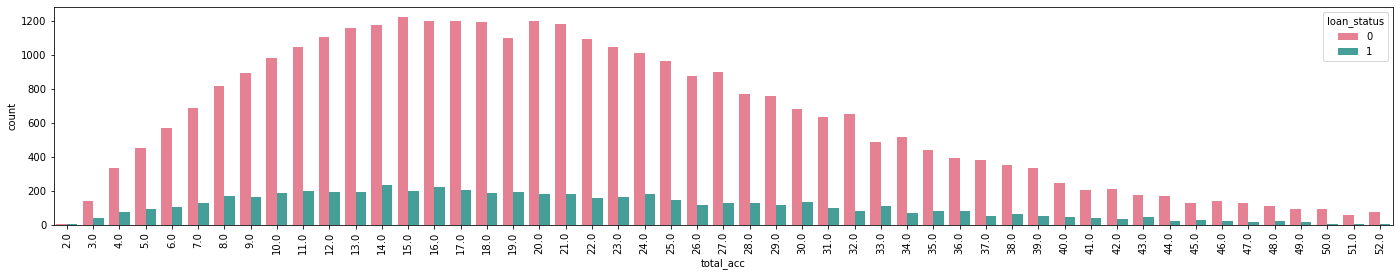

In [191]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=loans, x='total_acc', hue='loan_status', palette='husl');

In [192]:
loans.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,31775.0,21.227758,10.298593,2.0,13.0,20.0,28.0,52.0
1,5365.0,20.543709,10.386500,2.0,12.0,19.0,28.0,52.0


We can see that there is a diff in the mean between the both categories.

### 'pub_rec_bankruptcies'
Number of public record bankruptcies.

In [193]:
print(loans['pub_rec_bankruptcies'].unique())
print(loans['pub_rec_bankruptcies'].isnull().sum())

[ 0.  1.  2. nan]
643


In [194]:
loans['pub_rec_bankruptcies'].value_counts()

0.0    34867
1.0     1625
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [195]:
#checking correlation of the column with other, I will check only the highest 5.
abs(loans.corr()['pub_rec_bankruptcies']).sort_values(ascending=False)[1:5]

pub_rec           0.868252
fico_range_avg    0.131232
grade:A           0.090083
emp_length        0.062884
Name: pub_rec_bankruptcies, dtype: float64

In [196]:
#Like I thought 'pub_rec_bankruptcies' is highly correlated with pub_rec so I'm going to dropit
loans = loans.drop(['pub_rec_bankruptcies'], axis=1)

*Finaly all features are done, I will make sure there is no missing values and store the clean data in new CSV. I can start scaling my data*

In [203]:
#checking if my DF has any missing values
loans.isnull().sum()

loan_amnt                              0
term                                   0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_util                             0
total_acc                              0
fico_range_avg                         0
grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
grade:G                                0
home_ownership:MORTGAGE                0
home_ownership:OWN                     0
home_ownership:RENT                    0
verification_status:Not Verified       0
verification_status:Source Verified    0
verification_sta

In [204]:
loans.dtypes.value_counts()

uint8      27
float64    10
int64       2
dtype: int64

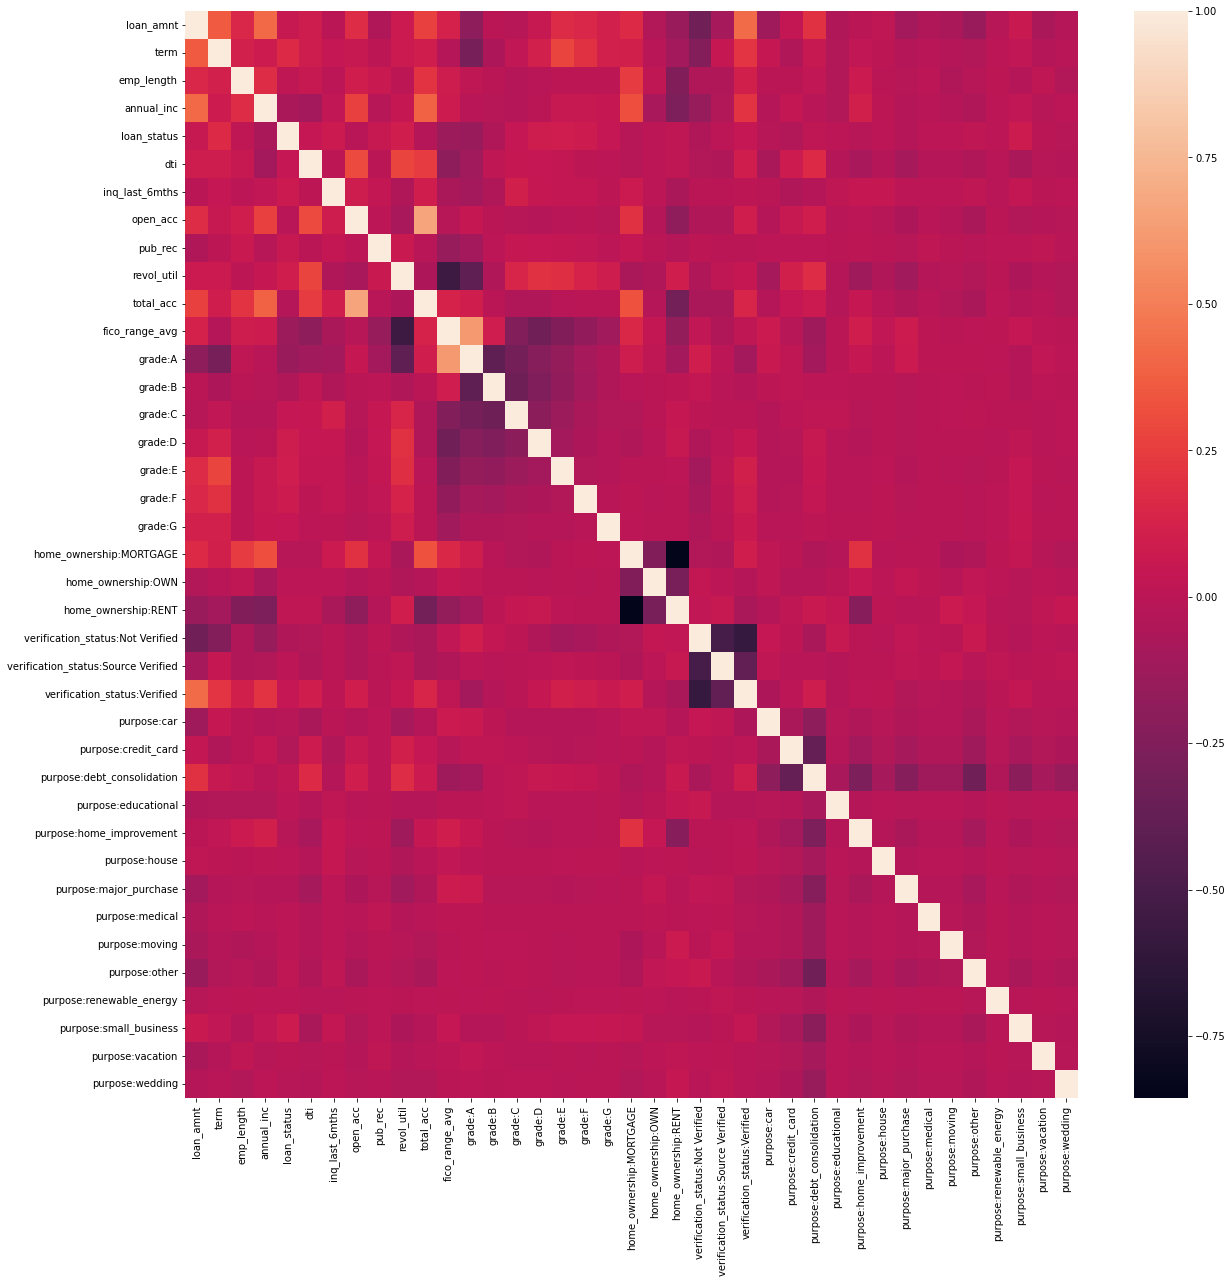

In [266]:
#checking correlation of features
plt.figure(figsize=(20,20))
sns.heatmap(loans.corr())
plt.show()

In [209]:
loans.to_csv('clean_loans.csv', index=False)

### Scaling my data and doing Test Train split

In [210]:
# reading the data
clean_loans_backup = pd.read_csv('clean_loans.csv')

In [211]:
clean_loans = clean_loans_backup

In [212]:
clean_loans.head()

,loan_amnt,term,emp_length,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,fico_range_avg,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
0,5000.0,36,10.0,24000.0,0,27.65,1.0,3.0,0.0,83.7,9.0,737.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2400.0,36,10.0,12252.0,0,8.72,2.0,2.0,0.0,98.5,10.0,737.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10000.0,36,10.0,49200.0,0,20.00,1.0,10.0,0.0,21.0,37.0,692.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,5000.0,36,3.0,36000.0,0,11.20,3.0,9.0,0.0,28.3,12.0,732.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7000.0,60,8.0,47004.0,0,23.51,1.0,7.0,0.0,85.6,11.0,692.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [213]:
clean_loans.shape

(37140, 39)

In [214]:
X = clean_loans.drop('loan_status', axis=1)

In [215]:
y = clean_loans['loan_status']

In [250]:
#importing needed libraris and functions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

<AxesSubplot:xlabel='loan_status', ylabel='count'>

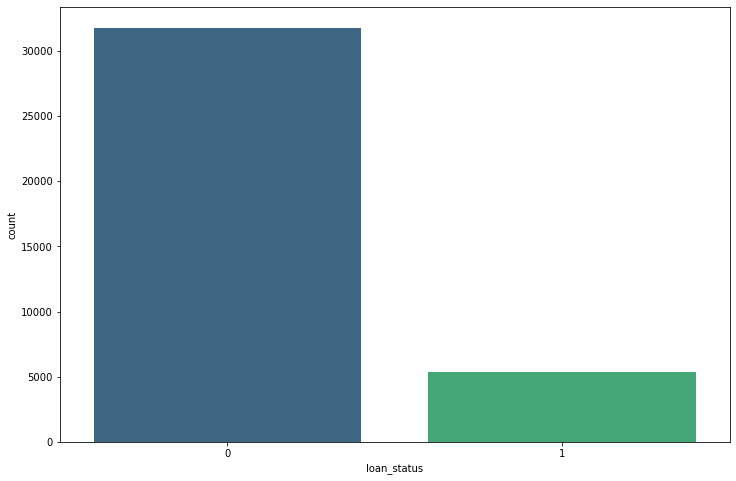

In [217]:
sns.countplot(data=clean_loans, x='loan_status', palette='viridis')

*Test Train split*

Splitting the data for training and testing

In [218]:
#splitting dataset into training and test in ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29712, 38) (29712,)
(7428, 38) (7428,)


In [219]:
#calculating baseline
round(y.value_counts(normalize=True).max(),4)

0.8555

*Feature Scaling*

Im going to use Robust Scaler (as I had some outliers), which is going to shrink data to median and quantiles hence not greatly influenced by outlieres

In [220]:
#Robust
robustS = RobustScaler()
X_train_robustS = robustS.fit_transform(X_train)
X_test_robustS = robustS.transform(X_test)

In [221]:
#choosing models
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'LogisticRegression': LogisticRegression(),
         'DecisionTreeClassifier': DecisionTreeClassifier(),
         'RandomForestClassifier': RandomForestClassifier()
}

#computing the training score of each models
train_scores =[]
test_scores = []
for key, model in models.items():
    model.fit(X_train, y_train)
    train_score = round(model.score(X_train, y_train),4)
    train_scores.append(train_score)
    test_score = round(model.score(X_test, y_test),4)
    test_scores.append(test_score)

    

In [222]:
print('Train scores are as follow:', train_scores)
print('Test scores are as follow:', test_scores)

Train scores are as follow: [0.8639, 0.8547, 1.0, 1.0]
Test scores are as follow: [0.8366, 0.8589, 0.7613, 0.8562]


In [235]:
#Cross validating

models = [KNeighborsClassifier(),
         LogisticRegression(),
         DecisionTreeClassifier(),
         RandomForestClassifier()]

skf = StratifiedKFold(n_splits=5, shuffle=False)  
for model in models:
    print(model)
    model.fit(X_train, y_train)
    print('The train CV score:', round(np.mean(cross_val_score(model, X_train, y_train, cv=skf)),4))
    print('The test CV score:', round(np.mean(cross_val_score(model, X_test, y_test, cv=skf)),4))
    y_pred = model.predict(X_test)
    print('---------------')
    
models[1].fit(X_train, y_train)
model1_coeff_matrix = pd.DataFrame(np.absolute(np.reshape(models[1].coef_, (-1, 1))),
                                  index=X_train.columns, columns=['Log_Odds_Coeff'])


KNeighborsClassifier()
The train CV score: 0.8375
The test CV score: 0.8425
---------------
LogisticRegression()
The train CV score: 0.8547
The test CV score: 0.8589
---------------
DecisionTreeClassifier()
The train CV score: 0.7556
The test CV score: 0.762
---------------
RandomForestClassifier()
The train CV score: 0.8541
The test CV score: 0.8581
---------------


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6380
           1       0.00      0.00      0.00      1048

    accuracy                           0.86      7428
   macro avg       0.43      0.50      0.46      7428
weighted avg       0.74      0.86      0.79      7428



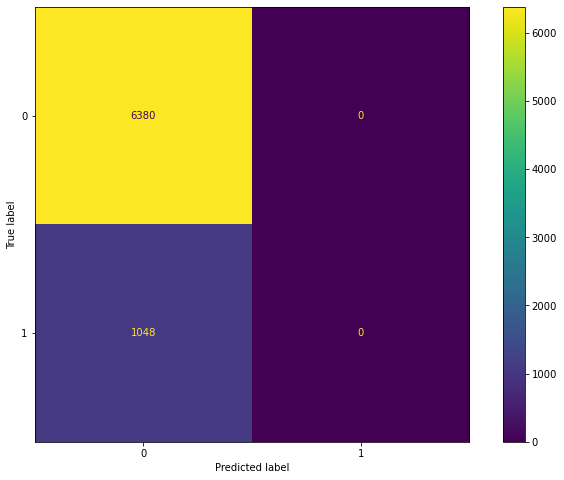

In [252]:
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train, y_train)

preds_LogReg = model_LogReg.predict(X_test) 

print(classification_report(y_test,preds_LogReg))
print(plot_confusion_matrix(model_LogReg,X_test,y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6380
           1       0.35      0.01      0.02      1048

    accuracy                           0.86      7428
   macro avg       0.60      0.50      0.47      7428
weighted avg       0.79      0.86      0.80      7428



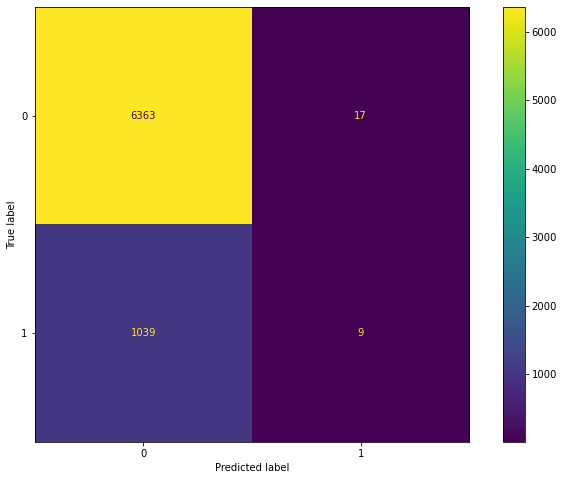

In [253]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

preds_RFC = model_RFC.predict(X_test) 

print(classification_report(y_test,preds_RFC))
print(plot_confusion_matrix(model_RFC,X_test,y_test))

GridSearch

In [236]:
# Logistic Regression
logReg = LogisticRegression()
logReg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_searchLR = GridSearchCV(logReg, logReg_params)
grid_searchLR.fit(X_train, y_train)
logReg_best = grid_searchLR.best_estimator_

# Random Forest
RFC = RandomForestClassifier()
RFC_parms = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,5,1)), 'min_samples_leaf': list(range(5,7,1))}
grid_searchRFC = GridSearchCV(RFC, RFC_parms)
grid_searchRFC.fit(X_train, y_train)
RFC_best = grid_searchRFC.best_estimator_

In [237]:
#printing results for Logistic Regression
print('Best estimatior for', logReg_best)
print('Logistic Regression training set score:', round(grid_searchLR.score(X_train, y_train),4))
print('Logistic Regression test set score:', round(grid_searchLR.score(X_test, y_test),4))

Best estimatior for LogisticRegression(C=0.01, solver='newton-cg')
Logistic Regression training set score: 0.8548
Logistic Regression test set score: 0.8593


In [240]:
print('Best estimatior for', RFC_best)
print('Random Forest training set score:', round(grid_searchRFC.score(X_train, y_train),4))
print('Random Forest test set score:', round(grid_searchRFC.score(X_test, y_test),4))

Best estimatior for RandomForestClassifier(max_depth=2, min_samples_leaf=5)
Random Forest training set score: 0.8547
Random Forest test set score: 0.8589


*Now for imbalanced data Im going to use SMOTE to see if the scores will improve. SMOTE - Synthetic Minority Oversampling Technique. SMOTE works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.*

In [267]:
# dealing with imbalance data
smote = SMOTE()
#applying SMOTE to train set
X_train_smoteR, y_train_smote = smote.fit_resample(X_train_robustS, y_train)

#checking value counts after oversampling
print('Original shape of dataset:', Counter(y_train))
print('Resample shape of dataset:', Counter(y_train_smote))

Original shape of dataset: Counter({0: 25395, 1: 4317})
Resample shape of dataset: Counter({0: 25395, 1: 25395})


#applying SMOTE to test set
X_test_smoteR, y_test_smote = smote.fit_resample(X_test_robustS, y_test)

#checking value counts after oversampling
print('Original shape of dataset:', Counter(y_test))
print('Resample shape of dataset:', Counter(y_test_smote))

Choosong models & fitting them

In [270]:
#choosing models
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'LogisticRegression': LogisticRegression(),
         'DecisionTreeClassifier': DecisionTreeClassifier(),
         'RandomForestClassifier': RandomForestClassifier()
}

#computing the training score of each models
train_scores_smote =[]
test_scores = []
for key, model in models.items():
    model.fit(X_train_smoteR, y_train_smote)
    train_score_smote = round(model.score(X_train_smoteR, y_train_smote),4)
    train_scores_smote.append(train_score_smote)
    test_score = round(model.score(X_test, y_test),4)
    test_scores.append(test_score)

    

In [271]:
print('Train scores are as follow:', train_scores_smote)
print('Test scores are as follow:', test_scores)

Train scores are as follow: [0.8721, 0.6533, 1.0, 1.0]
Test scores are as follow: [0.6042, 0.8589, 0.5331, 0.8589]


*Aftre running the algorithms on both train and test sets, it looks like Logistic Regression does not work well for the dataset as the scores are relatively low. 
Train test score for KNN is quite ok, but the test set score is much lower. Decision Tree and Random Forest performed best.*

In [261]:
#Cross validation score

train_cv_scores_smote = []
test_cv_scores = []

for key, model in models.items():
    model.fit(X_train_smoteR, y_train_smote)
    train_cv_score_smote = cross_val_score(model, X_train_smoteR, y_train_smote, cv=5)
    train_cv_scores_smote.append(round(train_cv_score_smote.mean(),4))
    test_cv_score = cross_val_score(model, X_test, y_test, cv=5)
    test_cv_scores.append(round(test_cv_score.mean(),4))
    

In [272]:
print('Train CV scores are as follow:', train_cv_scores_smote)
print('Test CV scores are as follow:', test_cv_scores)

Train CV scores are as follow: [0.8073, 0.6556, 0.8314, 0.9196]
Test CV scores are as follow: [0.8425, 0.8589, 0.7597, 0.8582]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6380
           1       0.00      0.00      0.00      1048

    accuracy                           0.86      7428
   macro avg       0.43      0.50      0.46      7428
weighted avg       0.74      0.86      0.79      7428



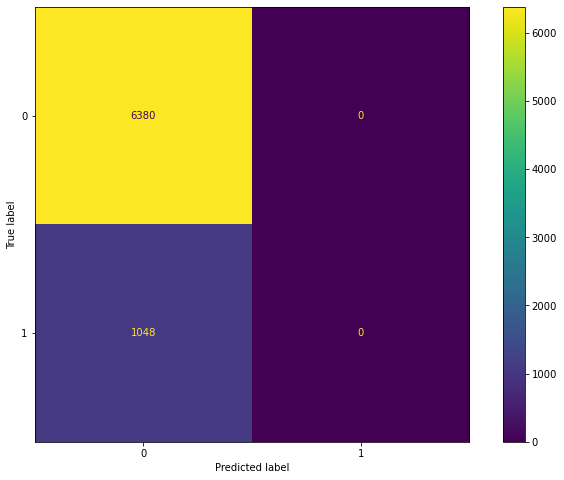

In [287]:
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train_smoteR, y_train_smote)

preds_LogReg = model_LogReg.predict(X_test) 

print(classification_report(y_test,preds_LogReg))
print(plot_confusion_matrix(model_LogReg,X_test, y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6380
           1       0.00      0.00      0.00      1048

    accuracy                           0.86      7428
   macro avg       0.43      0.50      0.46      7428
weighted avg       0.74      0.86      0.79      7428



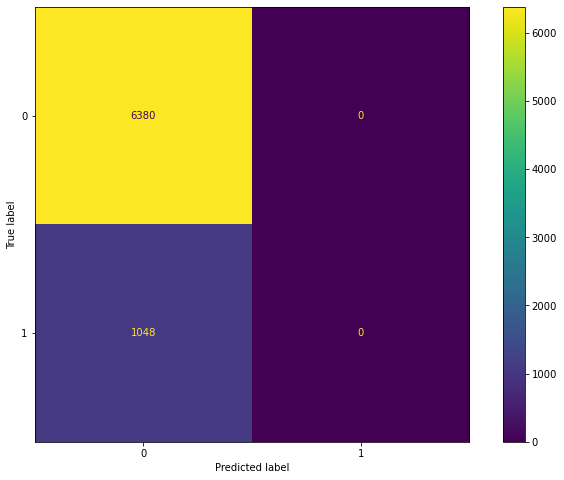

In [289]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train_smoteR, y_train_smote)

preds_RFC = model_RFC.predict(X_test) 

print(classification_report(y_test,preds_RFC))
print(plot_confusion_matrix(model_RFC,X_test, y_test))

*First thing to notice is that the gap between the train and test scores has got smaller. Random Forest again produced the best scores of over 92%*

I'm going to use GridSearchCV to find the best parameters and see if any further improvement can be achieved.

In [ ]:
# Logistic Regression
logReg_smote = LogisticRegression()
logReg_smote_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_searchLR_smote = GridSearchCV(logReg_smote, logReg_smote_params)
grid_searchLR_smote.fit(X_train_smoteR, y_train_smote)
logReg_smote_best = grid_searchLR_smote.best_estimator_

# Random Forest
RFC_smote_smote = RandomForestClassifier()
RFC_smote_parms = {'criterion': ['gini', 'entropy'], 'max_depth':y list(range(2,5,1)), 'min_samples_leaf': list(range(5,7,1))}
grid_searchRFC_smote = GridSearchCV(RFC, RFC_parms)
grid_searchRFC_smote.fit(X_train_smoteR, y_train_smote)
RFC_smote_best = grid_searchRFC_smote.best_estimator_

In [284]:
#printing results for Logistic Regression
print('Best estimatior for', logReg_best)
print('Logistic Regression training set score:', round(grid_searchLR.score(X_train_smoteR, y_train_smote),4))
print('Logistic Regression test set score:', round(grid_searchLR.score(X_test, y_test),4))

Best estimatior for LogisticRegression(C=0.01, solver='newton-cg')
Logistic Regression training set score: 0.6134
Logistic Regression test set score: 0.8593


In [285]:
#printing results for Random Forest
print('Best estimatior for', RFC_best)
print('Random Forest training set score:', round(grid_searchRFC.score(X_train_smoteR, y_train_smote),4))
print('Random Forest test set score:', round(grid_searchRFC.score(X_test, y_test),4))

Best estimatior for RandomForestClassifier(max_depth=2, min_samples_leaf=5)
Random Forest training set score: 0.5
Random Forest test set score: 0.8589
